In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
# Replace 'your_dataset.csv' with the actual dataset file path
data = pd.read_csv(r"D:\PCA\wine.csv")
print(data)

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  D

In [3]:
# Task 1: Exploratory Data Analysis (EDA)
# Basic data exploration
print(data.head())
print(data.describe())
print(data.info())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.0

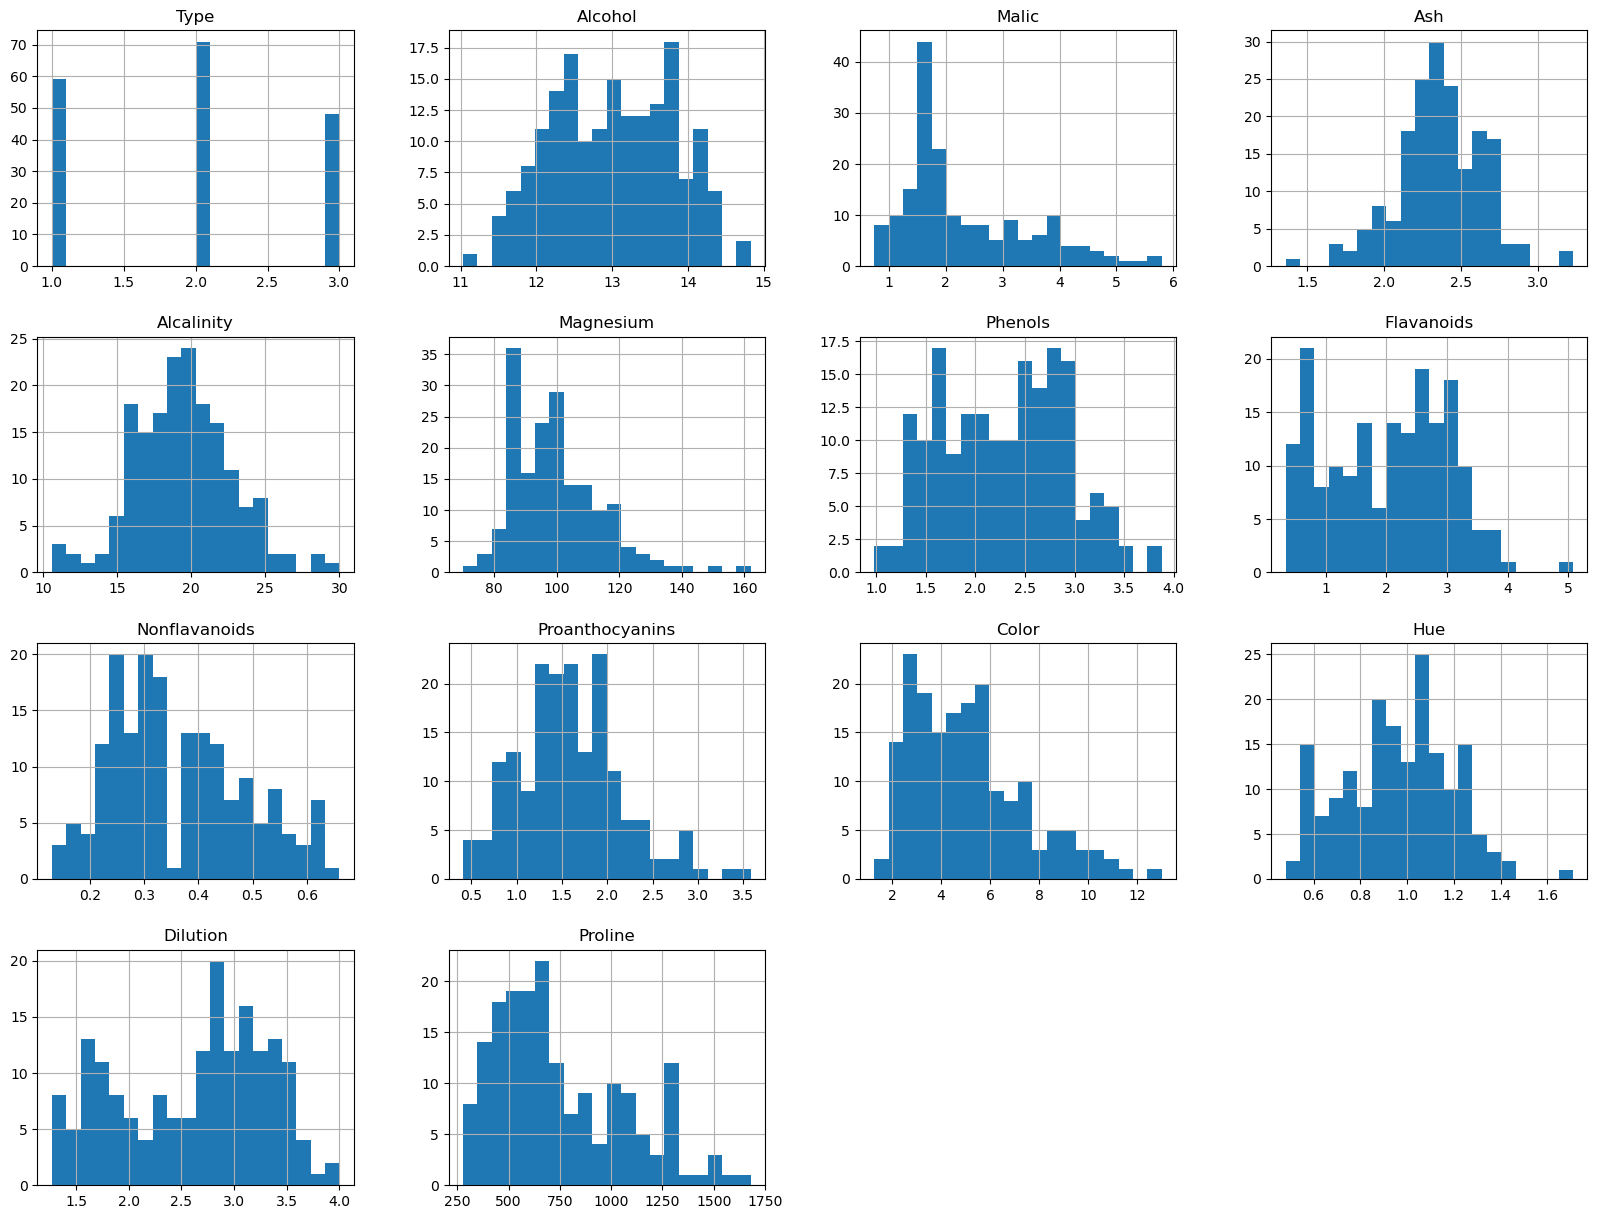

In [4]:
# Examine the distribution of features
data.hist(bins=20, figsize=(20, 15))
plt.show()

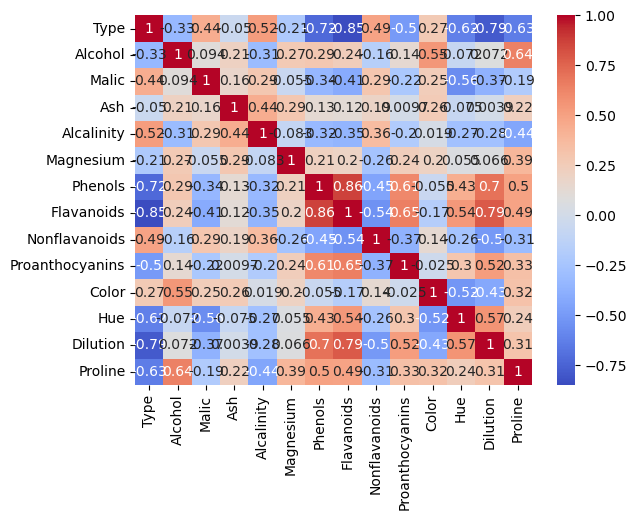

In [5]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Task 2: Dimensionality Reduction with PCA
# Standardize the features
numeric_data = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [7]:
# Implement PCA
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

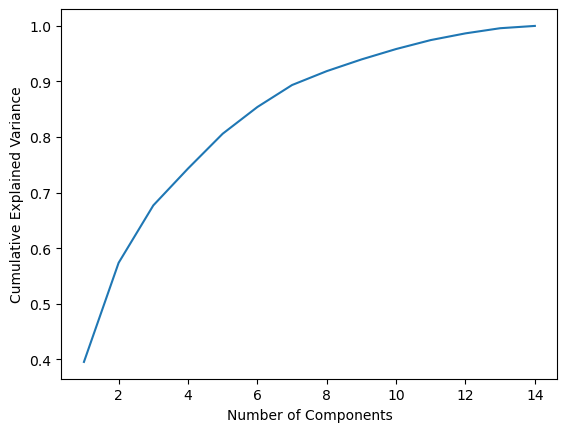

In [8]:
# Determine the optimal number of principal components
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [9]:
# Transform the original dataset into the principal components
optimal_components = np.argmax(explained_variance >= 0.95) + 1  # 95% variance
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(data_scaled)

In [10]:
# Task 3: Clustering with Original Data
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


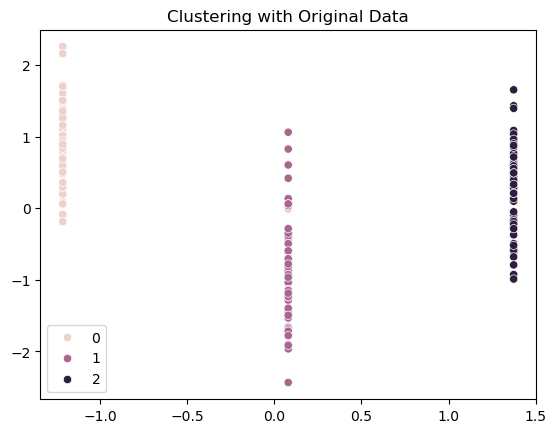

In [11]:
# Visualize the clustering results
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters)
plt.title("Clustering with Original Data")
plt.show()

In [12]:
# Evaluate clustering performance
silhouette_original = silhouette_score(data_scaled, clusters)
davies_bouldin_original = davies_bouldin_score(data_scaled, clusters)

print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


In [13]:
# Task 4: Clustering with PCA Data
# Apply K-means clustering to PCA-transformed data
clusters_pca = kmeans.fit_predict(pca_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


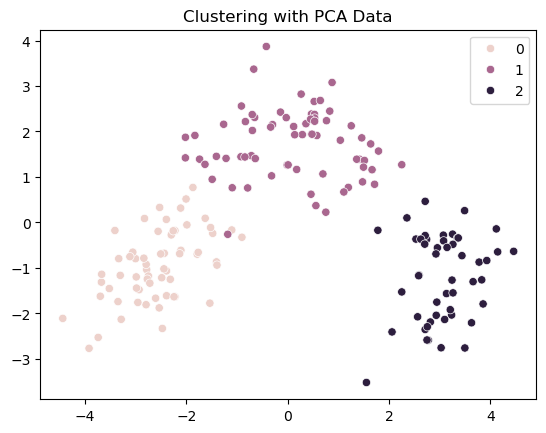

In [14]:
# Visualize the clustering results
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters_pca)
plt.title("Clustering with PCA Data")
plt.show()

In [15]:
# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_data, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, clusters_pca)

print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

Silhouette Score (PCA Data): 0.324065820533119
Davies-Bouldin Index (PCA Data): 1.2584890242254965


In [16]:
# Task 5: Comparison and Analysis
print("\nComparison and Analysis:")
print(f"Silhouette Score - Original Data: {silhouette_original}, PCA Data: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original}, PCA Data: {davies_bouldin_pca}")


Comparison and Analysis:
Silhouette Score - Original Data: 0.30773604383565206, PCA Data: 0.324065820533119
Davies-Bouldin Index - Original Data: 1.3163957434114109, PCA Data: 1.2584890242254965


In [19]:
# Task 6: Conclusion and Insights
print("\nConclusion and Insights:")
print("Summarize the findings and practical implications of using PCA and clustering in data analysis.")


Conclusion and Insights:
Summarize the findings and practical implications of using PCA and clustering in data analysis.
